# Week 5

Phew. You've handed in the assignment. But there's not resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* Then, in part 2, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. You had to read Chapter 3, which is about visualizing data with two variables, before coming to class today. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You will have to go and get it on DTU Learn due to the copyright stuff**.

And now a few exercises to reflect on the text:

*Exercise:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?
> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

1. The data follow a very easy to see pattern. 

2. 

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover?
>    * What kind of functions will loglog plots help you see?
> * Second, we are going to create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. 
> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. 
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. We've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.
>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Henter datasæt
data = pd.read_csv("../1_opstart/Data/data_2003_to_May_2018.csv")
data["Dato"] = pd.to_datetime(data['Date'], format="%m/%d/%Y") # Make the data datetime
data['year']= data['Dato'].dt.year # Make a variable for year
data["week"]= data["Dato"].dt.day_name()
data["month"]= data["Dato"].dt.month_name()
data["Hour"] = pd.to_datetime(data["Time"], format="%H:%M").dt.hour
data["12_hours"] = [datetime.strftime(datetime.strptime(str(t), "%H"), "%I %p") for t in data["Hour"] ]
data["Weekday_Hour"] = data["week"] + "-" + data["12_hours"] 
data = data[data["year"]!=2018]

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hour_order = [datetime.strftime(datetime.strptime(str(t), "%H"), "%I %p") for t in range(24)]
weekday_hour_order = [weekday + "-" + hour for weekday in weekday_order for hour in hour_order]

#data["week"] = [str(x) for x in data["week"]]

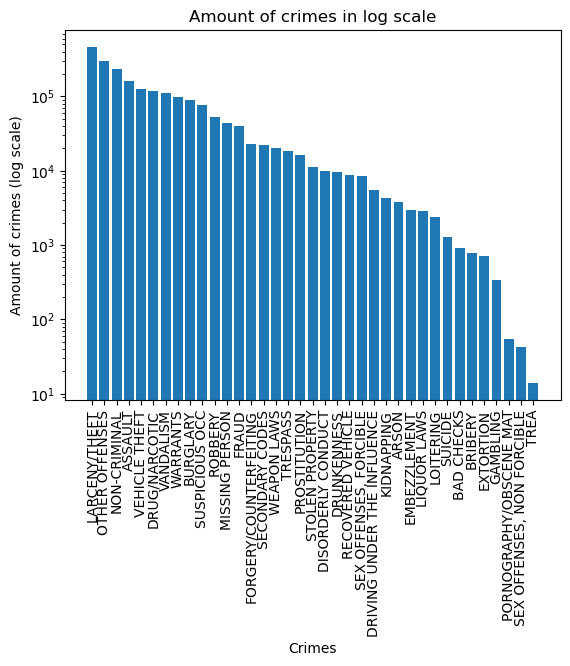

In [3]:
df = data.value_counts("Category")
# Create the barplot
plt.bar(df.index, df.values)

# Set the y-axis to log-scale
plt.yscale('log')

# Add axis labels and a title
plt.xlabel('Crimes')
plt.ylabel('Amount of crimes (log scale)')
plt.title('Amount of crimes in log scale')

plt.xticks(rotation=90)

# Display the plot
plt.show()

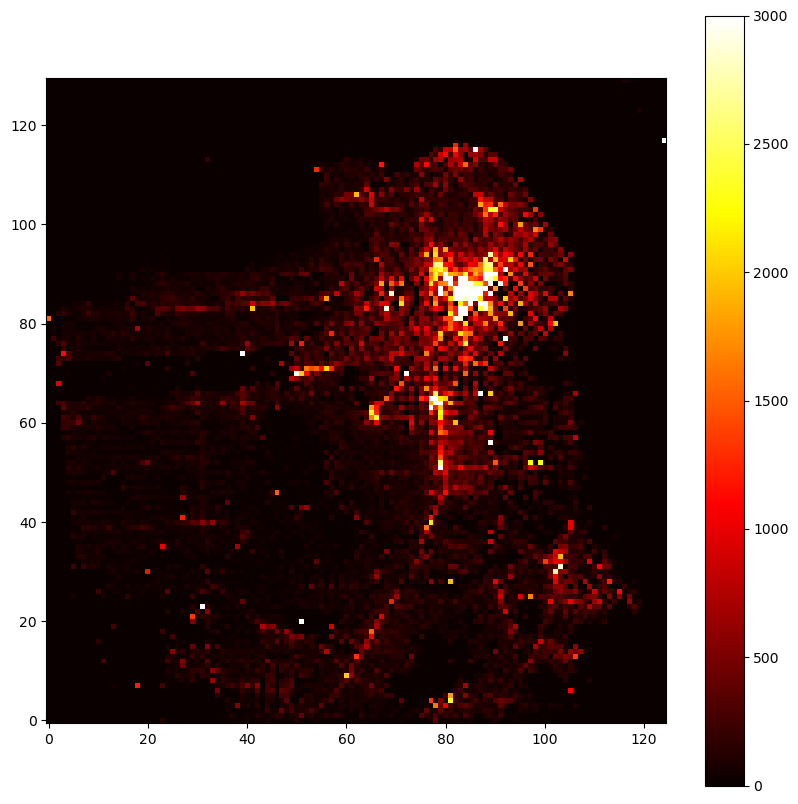

In [4]:
data = data[(data.Y < 50) & (data.X<-122)]

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

lat_min = data.Y.min()
lat_max = data.Y.max()
lon_min = data.X.min()
lon_max = data.X.max()


count, lon, lat = np.histogram2d(data.Y, data.X, bins = [130,125])


plt.figure(figsize=(10,10))
plt.imshow(count, cmap='hot',vmax=3000, origin='lower')
plt.colorbar()

## Part 2: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question. 

> *Which pair of focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

Below I list the focus-crimes for your convenience

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 14 focus crimes that results in 91 pairwise comparisons. 

*Exercise*: Create the 91 scatterplots.
> * Display the plots in a $7$ by $13$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

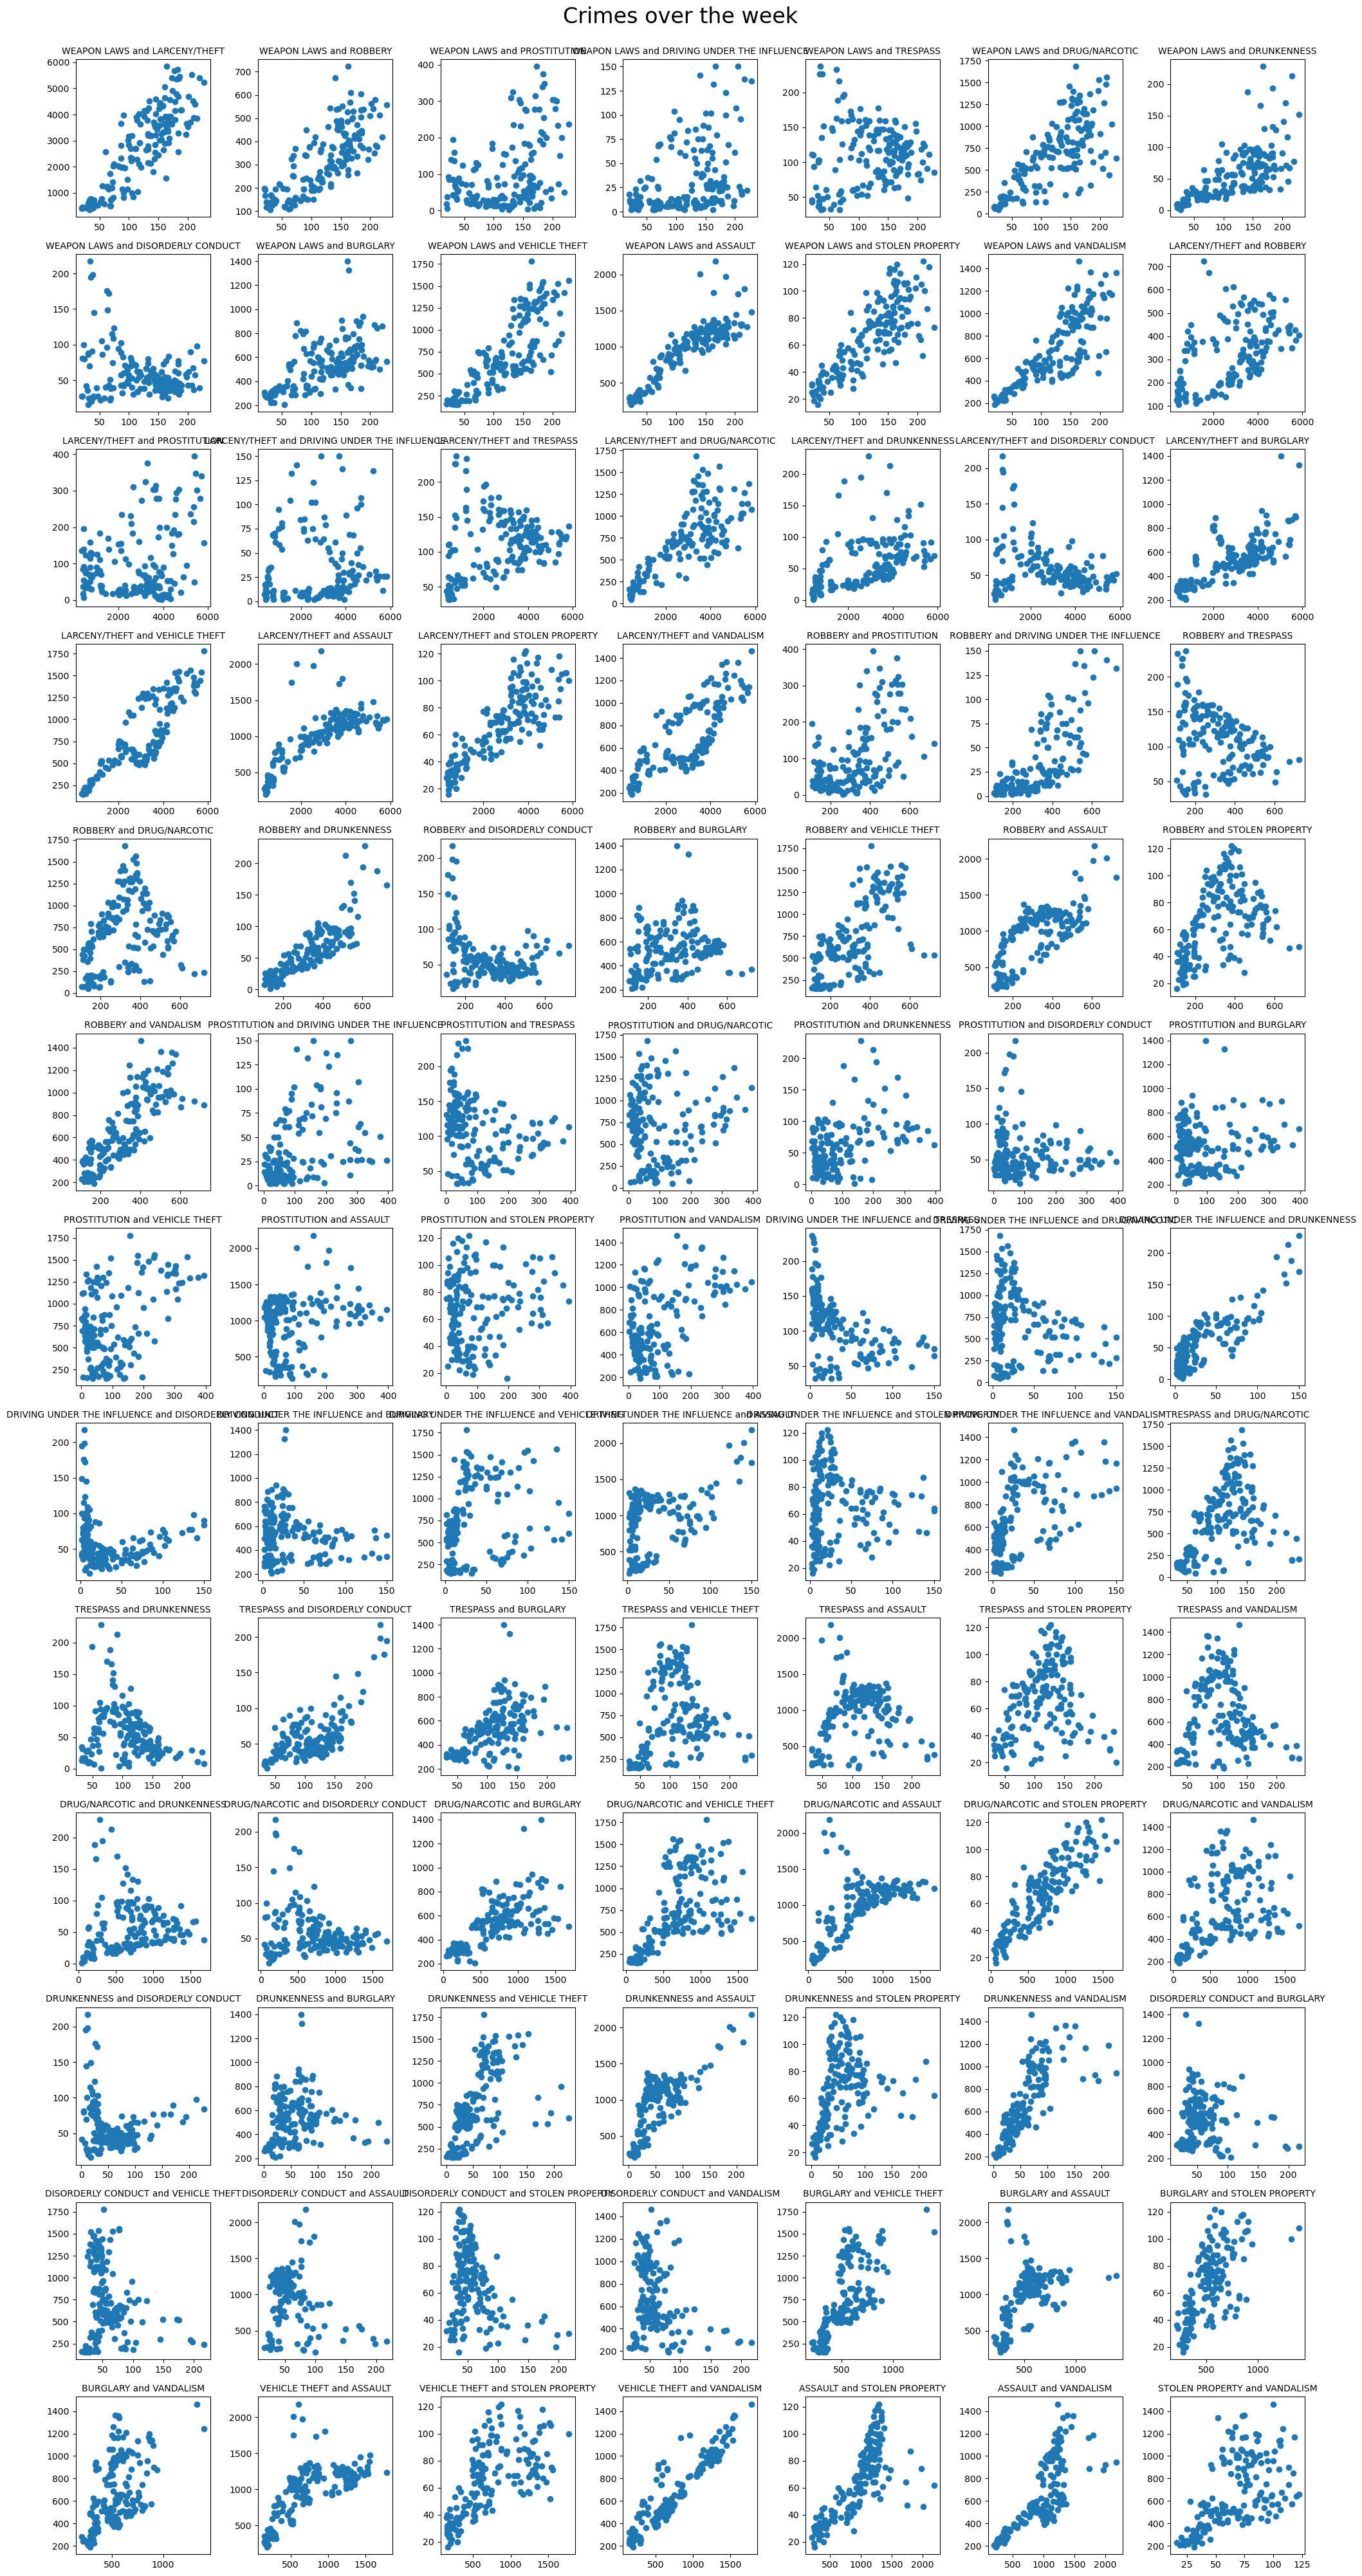

In [6]:
t = 1
already_plotted = []
fig = plt.figure(figsize=(20,40))
for x in focuscrimes:
    df_x = data[data["Category"]==x]
    df_x = df_x.value_counts("Weekday_Hour").reindex(weekday_hour_order)
    for y in focuscrimes:
        already_plotted.append(x)
        if y in already_plotted:
            continue
        df_y = data[data["Category"]==y]
        df_y = df_y = df_y.value_counts("Weekday_Hour").reindex(weekday_hour_order)
        plt.subplot(13,7,t)
        plt.scatter(df_x, df_y)
        plt.title("{} and {}".format(x,y), fontsize=10)
        t +=1

plt.suptitle("Crimes over the week", fontsize=24, y=1.00)
plt.tight_layout()

I see multiple scatterplots which seem correlated. Stolen property and larcency/theft, vandalism and vehicle theft, assault and weapon laws

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, I actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise:* Linear regression.

> * Using the formulas we derived above (Equation 1 and 2), calculate the slopes for $a$ and $b$ in each case. (You can compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.)
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue).

In [7]:
def calculate_slope(x, y):
    n = len(x)
    x_mean = sum(x)/n
    y_mean = sum(y)/n
    numerator = sum((x-x_mean)*(y-y_mean))
    denominator = sum((x-x_mean)**2)
    slope = numerator/denominator
    intercept = y_mean - slope*x_mean
    return slope, intercept

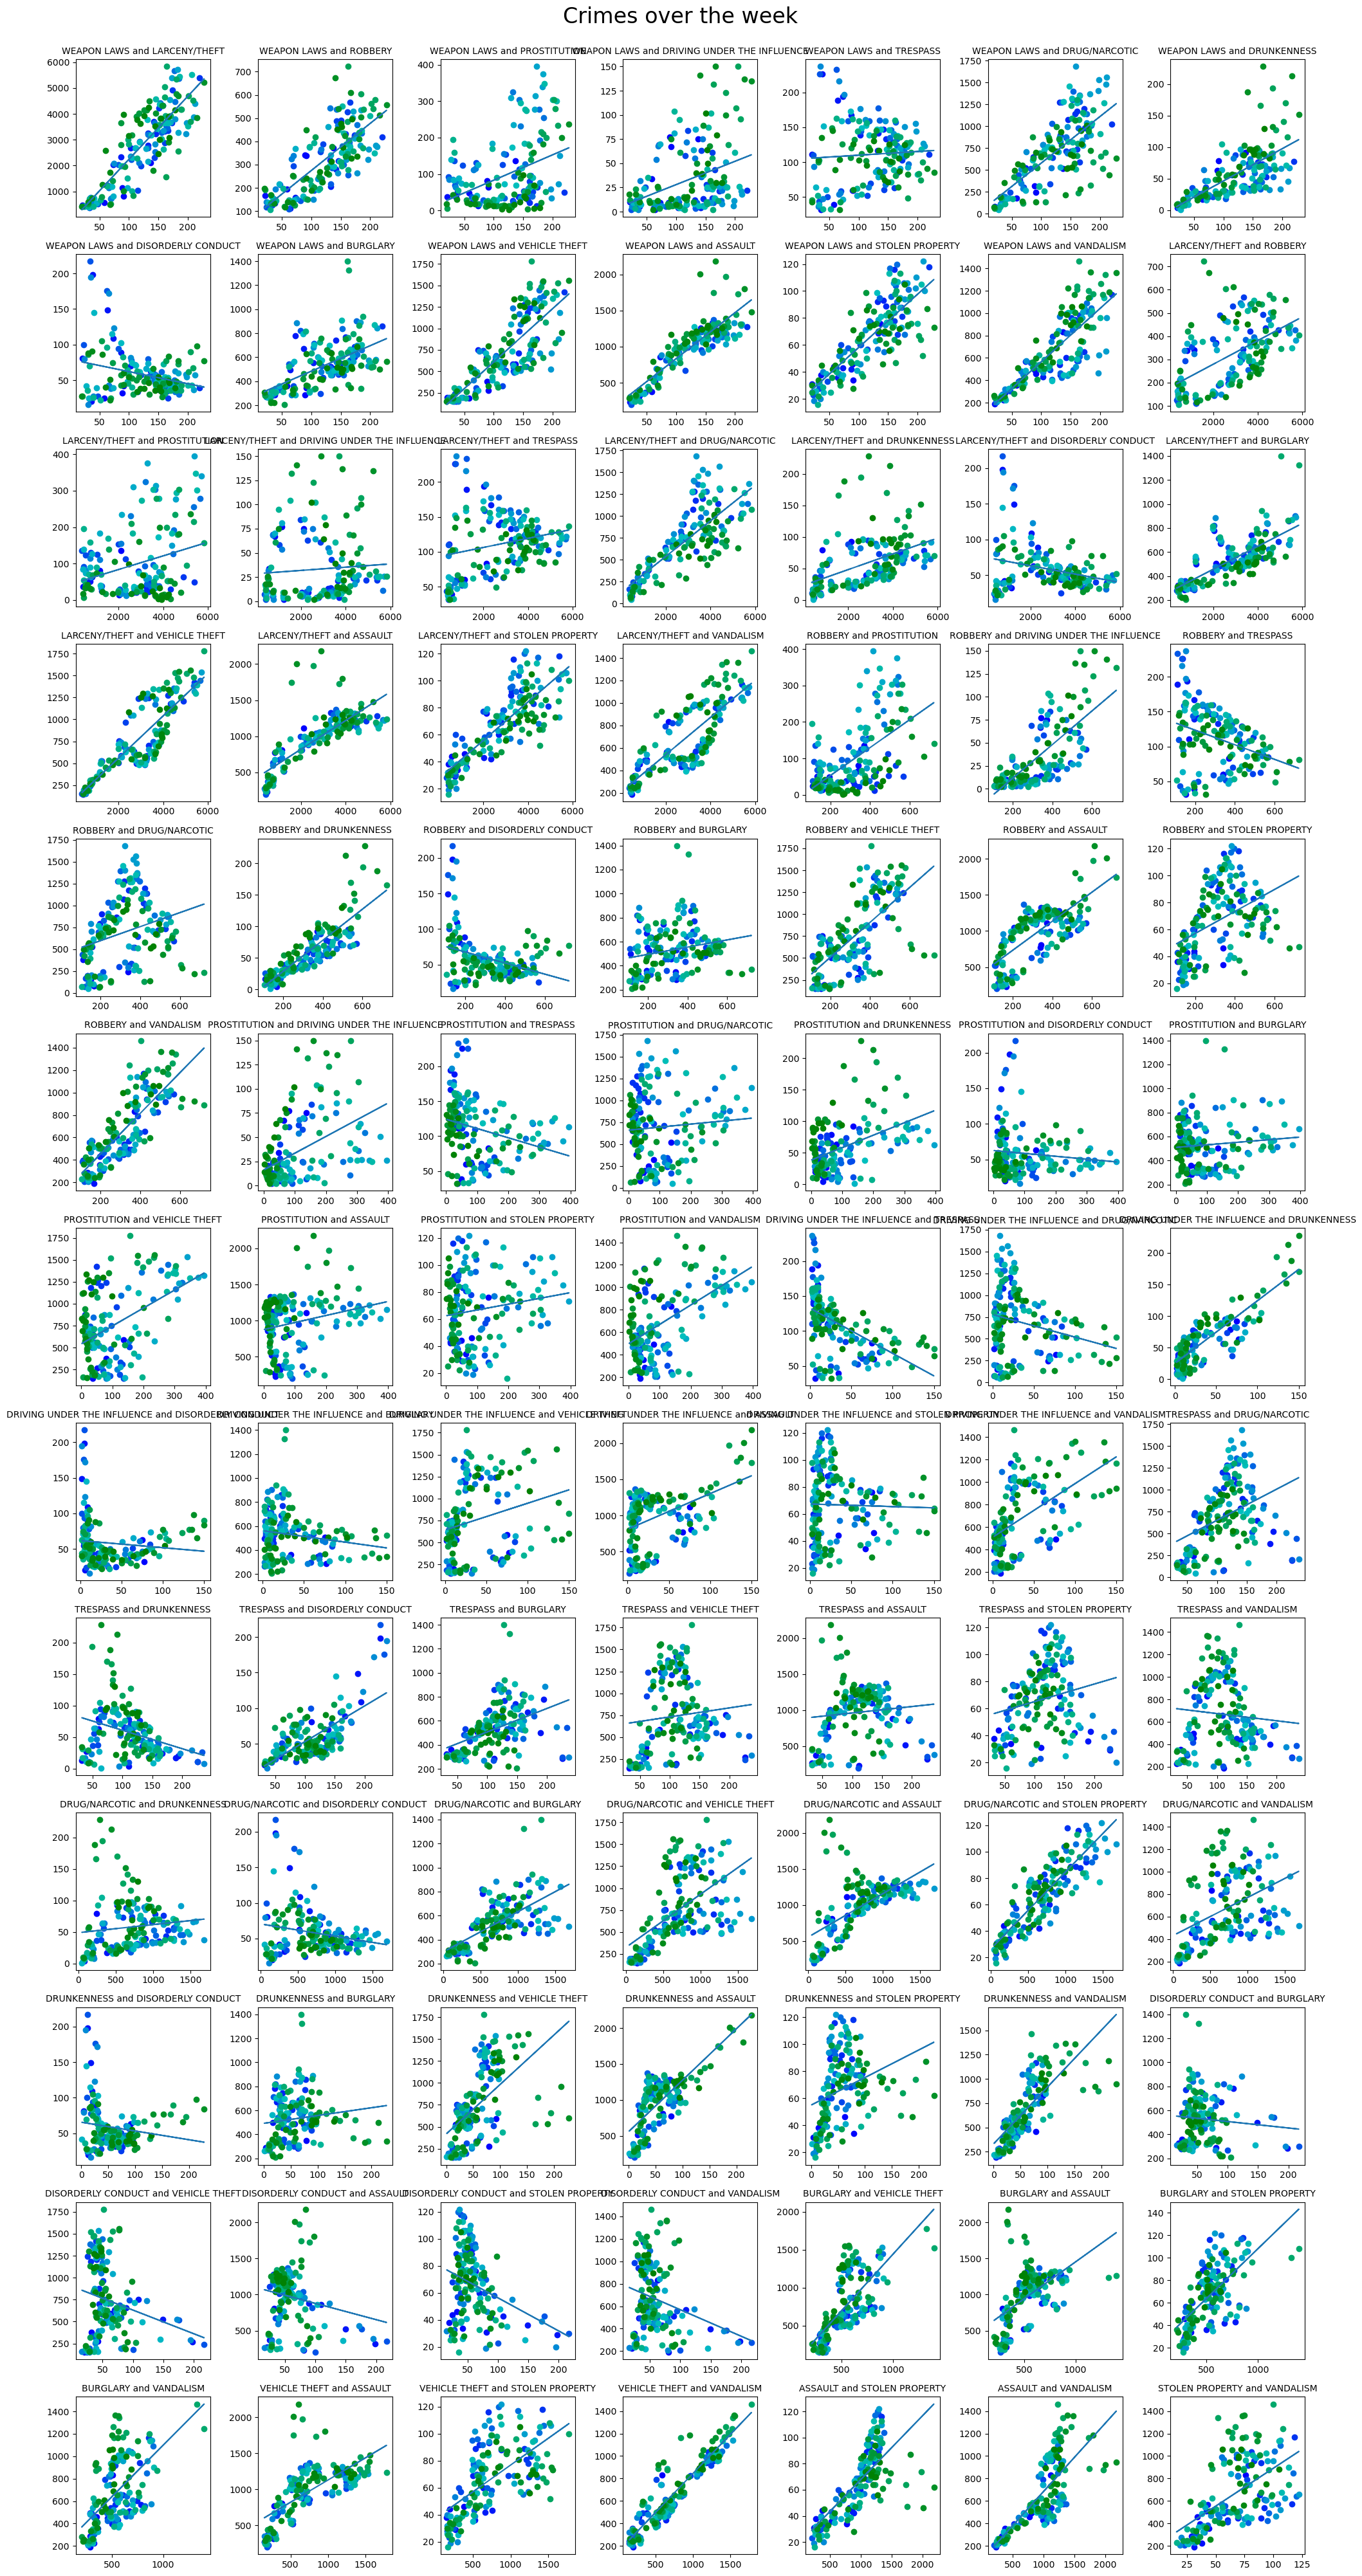

In [8]:
from colour import Color
red = Color("blue")
colors = list(red.range_to(Color("green"),168))
t = 1
already_plotted = []
fig = plt.figure(figsize=(20,40))
for x in focuscrimes:
    df_x = data[data["Category"]==x]
    df_x = df_x.value_counts("Weekday_Hour").reindex(weekday_hour_order)
    for y in focuscrimes:
        already_plotted.append(x)
        if y in already_plotted:
            continue
        df_y = data[data["Category"]==y]
        df_y = df_y = df_y.value_counts("Weekday_Hour").reindex(weekday_hour_order)
        slope, intercept = calculate_slope(df_x,df_y)
        plt.subplot(13,7,t)
        farver = 0
        # Jeg er lidt i tvivl om det her virker
        for weekday_hour_orderen in weekday_hour_order:
            df_hourx = df_x[df_x.index==weekday_hour_orderen]
            df_houry = df_y[df_y.index==weekday_hour_orderen]
            plt.scatter(df_hourx, df_houry, color=str(colors[farver]))
            farver +=1
        plt.plot(df_x, slope*df_x + intercept)
        plt.title("{} and {}".format(x,y), fontsize=10)
        t +=1

plt.suptitle("Crimes over the week", fontsize=24, y=1.00)
plt.tight_layout()

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. You probably also remember this one. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.)
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes.

In [9]:
def r_squared(x, y):
    # Compute the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Compute the sum of squares of x, y, and their product
    ss_x = np.sum((x - x_mean) ** 2)
    ss_y = np.sum((y - y_mean) ** 2)
    ss_xy = np.sum((x - x_mean) * (y - y_mean))
    

    # Compute the coefficient of determination (r-squared)
    r2 = ss_xy ** 2 / (ss_x * ss_y)
    
    return r2


In [10]:
already_plotted=[]
data_list = []
for x in focuscrimes:
    df_x = data[data["Category"]==x]
    df_x = df_x.value_counts("Weekday_Hour").reindex(weekday_hour_order)
    for y in focuscrimes:
        already_plotted.append(x)
        if y in already_plotted:
            continue
        df_y = data[data["Category"]==y]
        df_y = df_y = df_y.value_counts("Weekday_Hour").reindex(weekday_hour_order)
        R_2 = r_squared(df_x,df_y)
        data_list.append((x, y, R_2))

# Vandalism and Vehicle theft is the ones with the highest R_2
df = pd.DataFrame(data_list, columns=["Crime1", "Crime2", "R_2"])

print(df[df["R_2"]==max(df["R_2"], )])
print(df[df["R_2"]==min(df["R_2"], )])


           Crime1     Crime2       R_2
87  VEHICLE THEFT  VANDALISM  0.865925
                         Crime1           Crime2       R_2
53  DRIVING UNDER THE INFLUENCE  STOLEN PROPERTY  0.000647


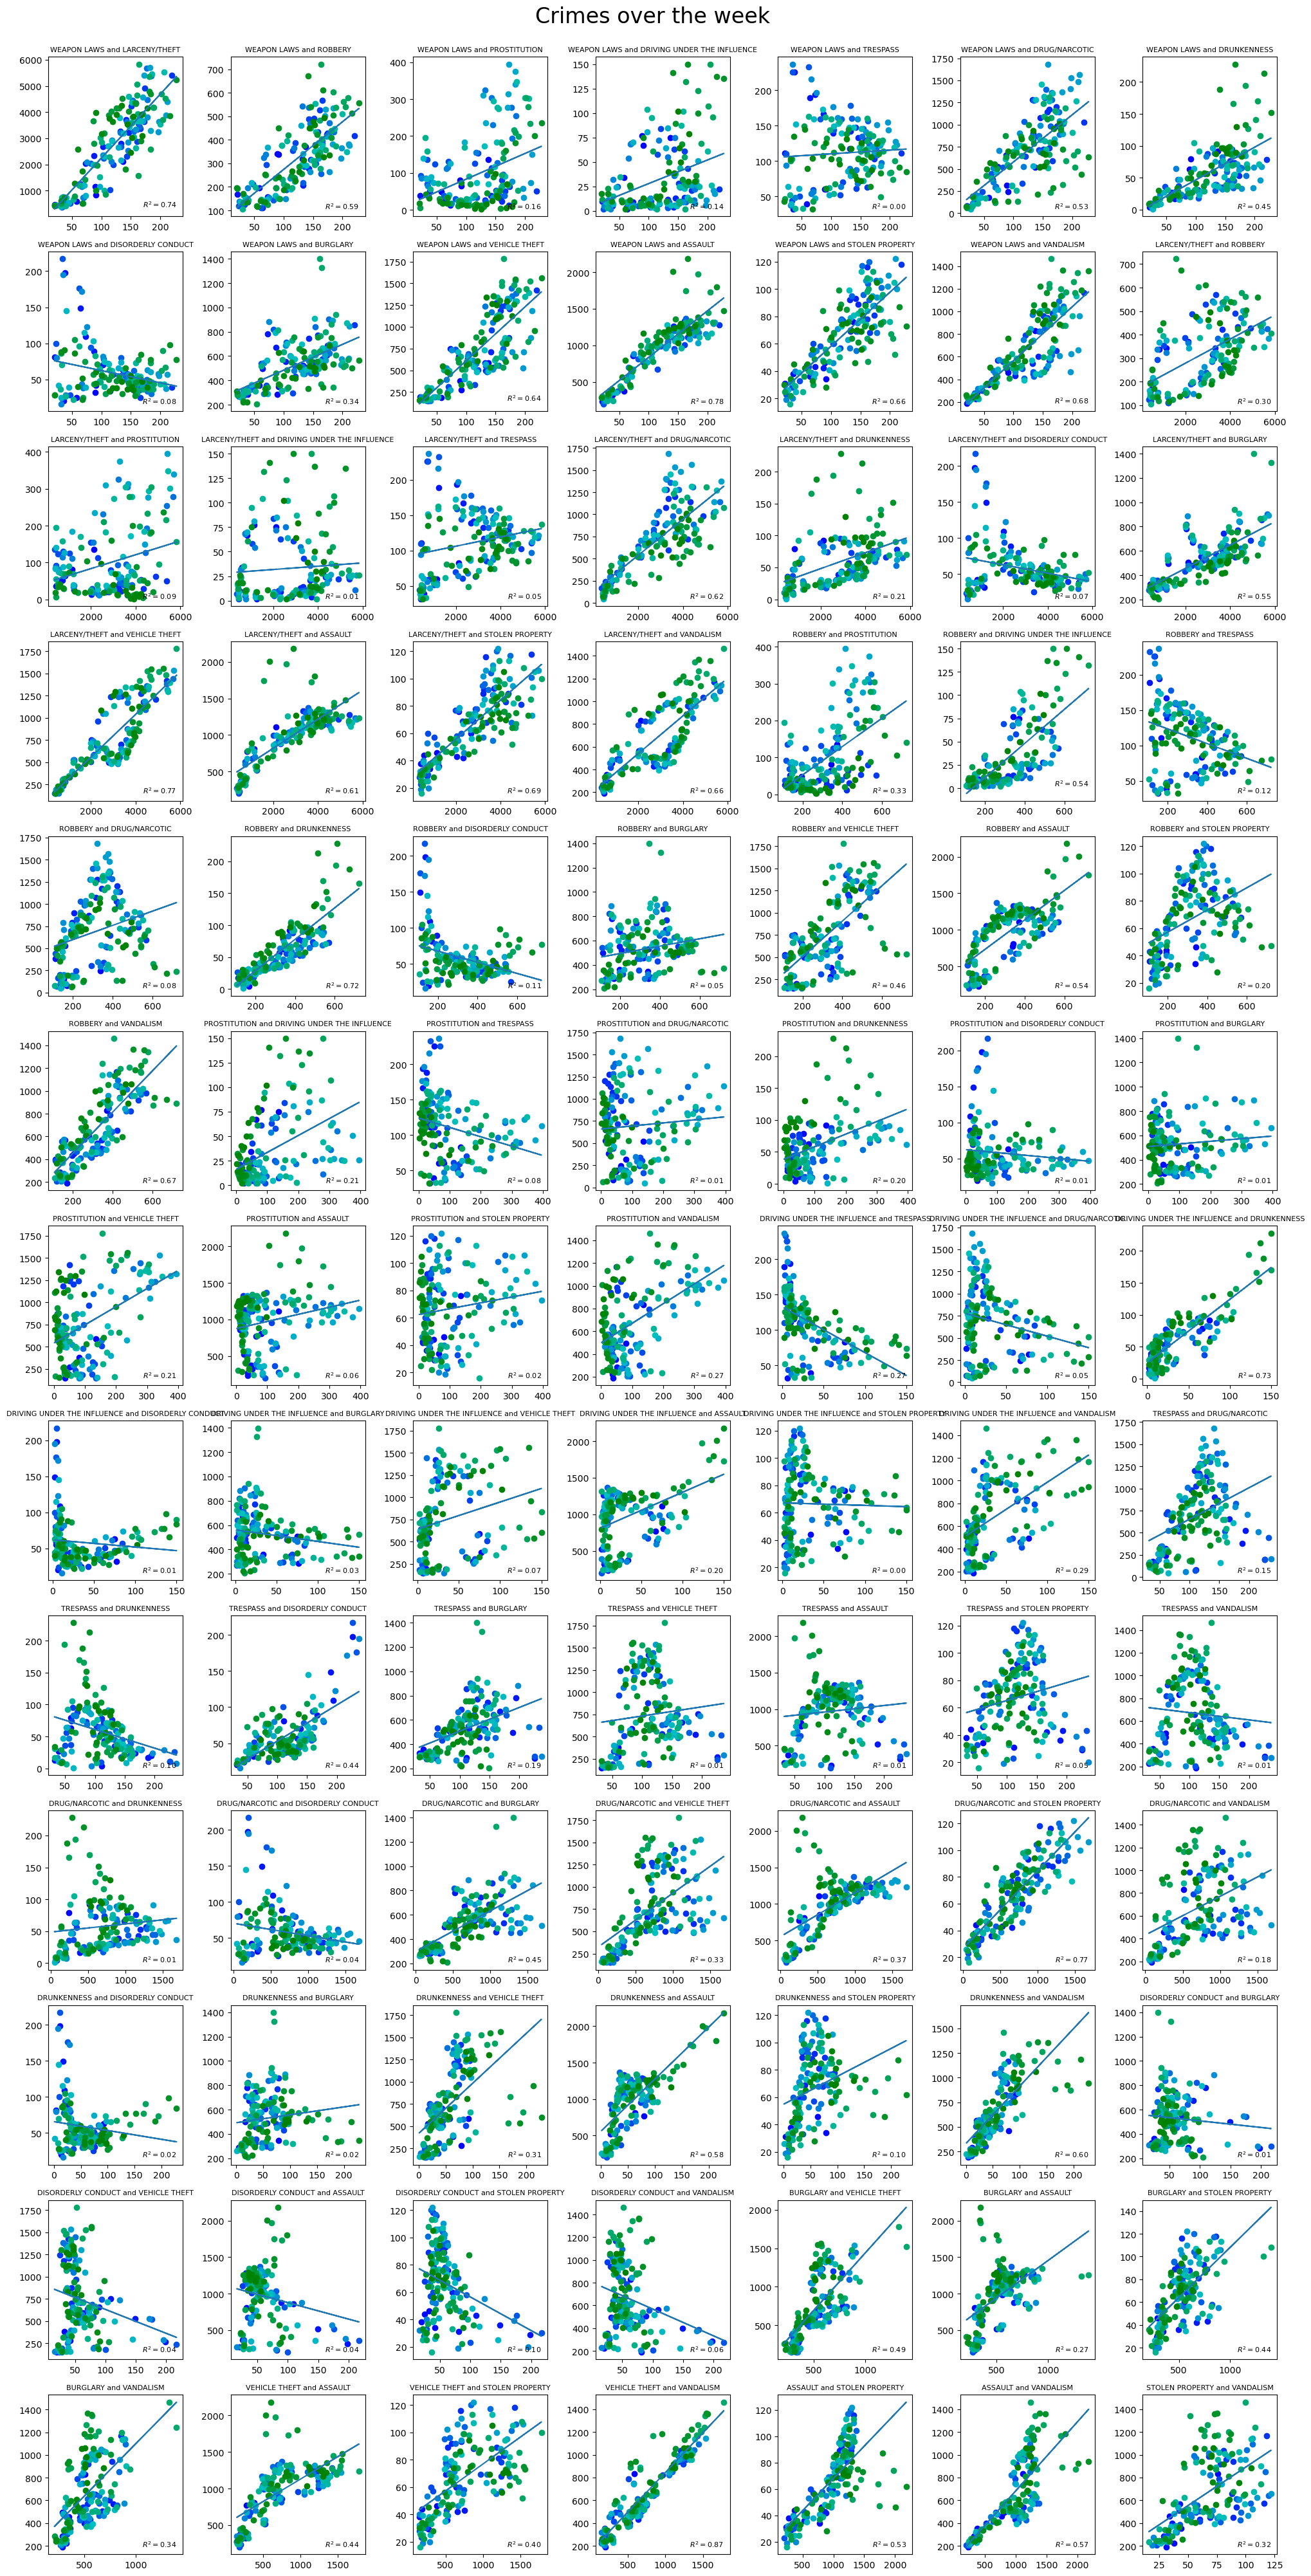

In [14]:
from colour import Color
red = Color("blue")
colors = list(red.range_to(Color("green"),168))
t = 1
already_plotted = []
fig = plt.figure(figsize=(20,40))
for x in focuscrimes:
    df_x = data[data["Category"]==x]
    df_x = df_x.value_counts("Weekday_Hour").reindex(weekday_hour_order)
    for y in focuscrimes:
        already_plotted.append(x)
        if y in already_plotted:
            continue
        df_y = data[data["Category"]==y]
        df_y = df_y = df_y.value_counts("Weekday_Hour").reindex(weekday_hour_order)
        slope, intercept = calculate_slope(df_x,df_y)
        plt.subplot(13,7,t)
        R_2 = round(r_squared(df_x, df_y), 3)
        farver = 0
# Building the graph with different colors depending on time of day
        for weekday_hour_orderen in weekday_hour_order:
            df_hourx = df_x[df_x.index==weekday_hour_orderen]
            df_houry = df_y[df_y.index==weekday_hour_orderen]
            plt.scatter(df_hourx, df_houry, color=str(colors[farver]))
            farver +=1
        plt.plot(df_x, slope*df_x + intercept)
        plt.title("{} and {}".format(x,y), fontsize=8)
        plt.text(df_x.max(), df_y.min(), f"$R^2 = {R_2:.2f}$", fontsize=8,
            horizontalalignment="right", verticalalignment="bottom")
        t +=1

plt.suptitle("Crimes over the week", fontsize=24, y=1.00)
plt.tight_layout()